# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [4]:
df.dtypes

data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [5]:
df['data_ref'] = pd.to_datetime(df['data_ref'], format='%Y-%m-%d')

In [6]:
df.dtypes

data_ref                 datetime64[ns]
index                             int64
sexo                             object
posse_de_veiculo                   bool
posse_de_imovel                    bool
qtd_filhos                        int64
tipo_renda                       object
educacao                         object
estado_civil                     object
tipo_residencia                  object
idade                             int64
tempo_emprego                   float64
qt_pessoas_residencia           float64
mau                                bool
renda                           float64
dtype: object

In [7]:
df_quant = df[['idade', 'qtd_filhos', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]
df_quant.corr()

,idade,qtd_filhos,tempo_emprego,qt_pessoas_residencia,renda
idade,1.000000,-0.364303,0.323934,-0.338805,0.042570
qtd_filhos,-0.364303,1.000000,-0.074250,0.896488,0.009567
tempo_emprego,0.323934,-0.074250,1.000000,-0.065748,0.394235
qt_pessoas_residencia,-0.338805,0.896488,-0.065748,1.000000,0.020977
renda,0.042570,0.009567,0.394235,0.020977,1.000000


In [8]:
df.isna().sum()

data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64

In [9]:
df.shape

(15000, 15)

In [10]:
# Criando um DataFrame com apenas os valores NaN em 'tempo_emprego'
df_nan = df[df['tempo_emprego'].isnull()]

In [11]:
# Agrupando por 'tipo_renda' e calculando as estatísticas desejadas
resultado = df_nan.groupby('tipo_renda')['tempo_emprego'].agg(['count', 'size'])

In [12]:
resultado

,count,size
tipo_renda,,
Pensionista,0,2534


In [13]:
df_nan['tipo_renda'].value_counts()

tipo_renda
Pensionista    2534
Name: count, dtype: int64

In [14]:
df_pes = df[df['tipo_renda']=='Pensionista']
df_pes

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
12,2015-01-01,5090,M,True,True,2,Pensionista,Primário,Casado,Casa,60,NaN,4.0,False,5114.70
19,2015-01-01,1860,M,True,True,0,Pensionista,Superior completo,Casado,Casa,64,NaN,2.0,False,4501.53
26,2015-01-01,3453,F,False,True,1,Pensionista,Secundário,Casado,Casa,56,NaN,3.0,False,2053.04
27,2015-01-01,2317,F,False,True,0,Pensionista,Secundário,Casado,Casa,65,NaN,2.0,False,6714.39
30,2015-01-01,13799,F,True,False,0,Pensionista,Primário,Casado,Casa,64,NaN,2.0,False,1350.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14970,2016-03-01,6998,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,65,NaN,1.0,False,2880.59
14975,2016-03-01,6990,F,False,True,0,Pensionista,Superior incompleto,Viúvo,Casa,66,NaN,1.0,False,4625.11
14977,2016-03-01,307,F,False,False,0,Pensionista,Superior completo,Viúvo,Casa,59,NaN,1.0,False,1265.07
14988,2016-03-01,15110,F,False,True,0,Pensionista,Secundário,Casado,Casa,51,NaN,2.0,False,853.98


In [15]:
df.fillna(0, inplace=True)

In [16]:
df.isna().sum()

data_ref                 0
index                    0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
mau                      0
renda                    0
dtype: int64

C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\alima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

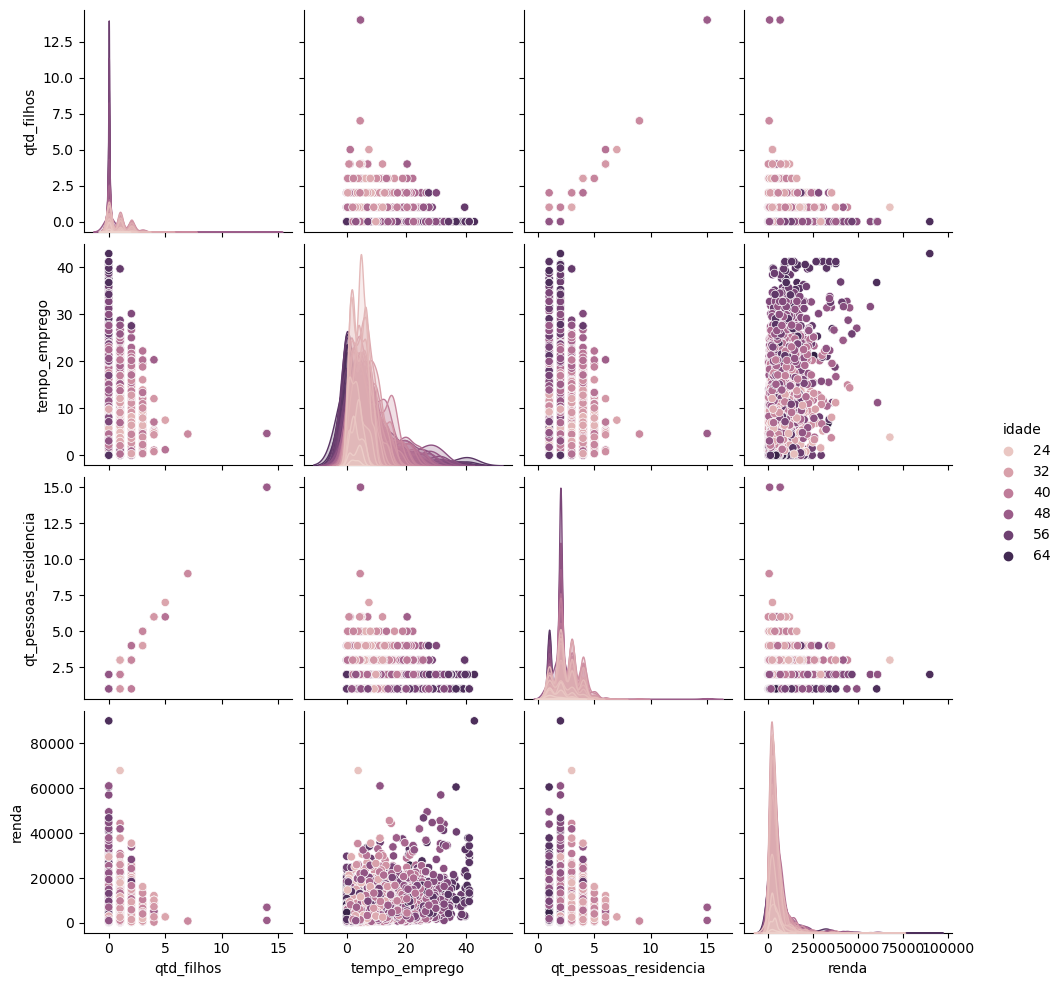

In [17]:
# Supondo que seu DataFrame se chama df
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('index')  # Remove 'index' da lista

# Criando a matriz de dispersão
sns.pairplot(df[numeric_cols], hue='idade')
plt.show()

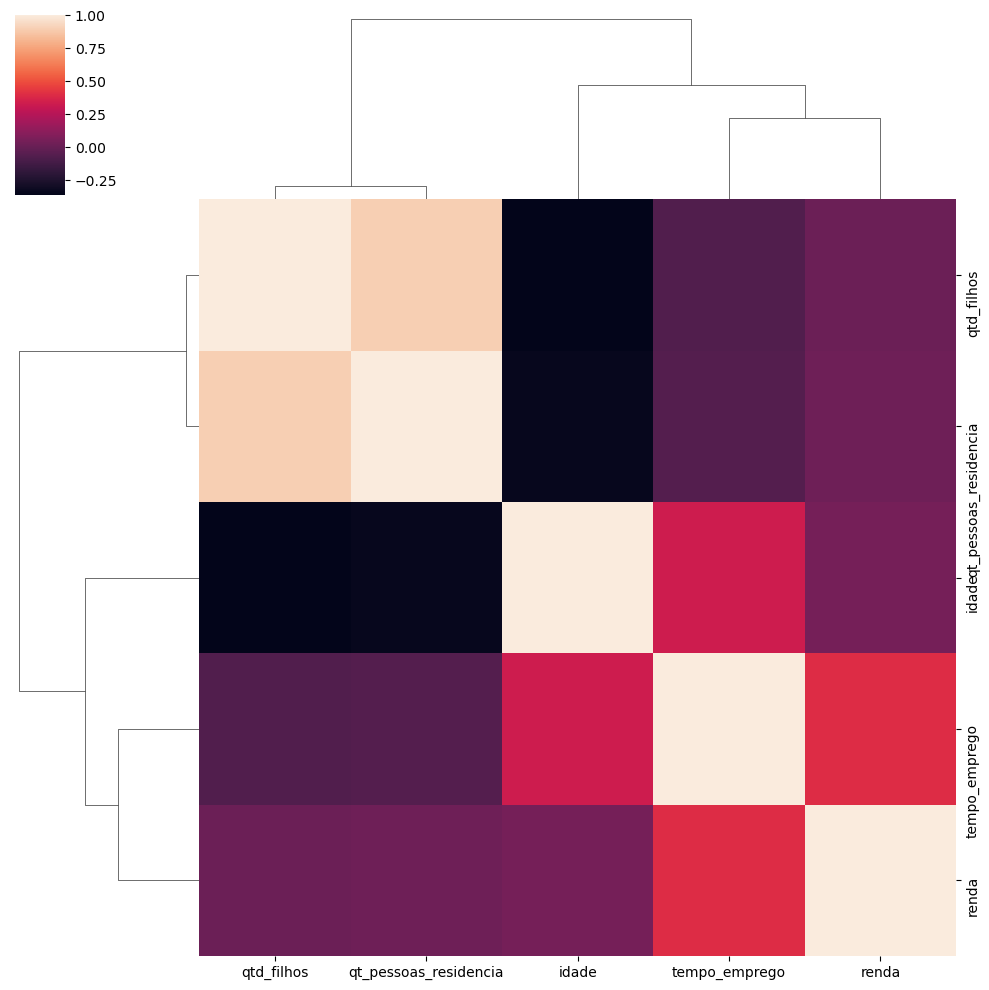

In [18]:
sns.clustermap(df_quant.corr())

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

<Axes: xlabel='tempo_emprego', ylabel='idade'>

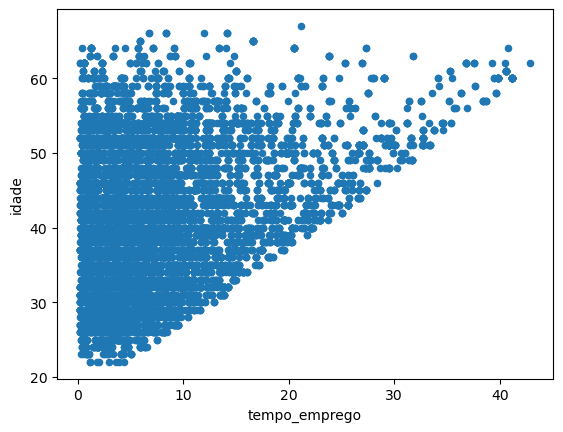

In [20]:
df_quant[['idade', 'tempo_emprego']].plot.scatter(x='tempo_emprego', y='idade')

3) Na su aopinião, há outliers na variável renda?

<Axes: xlabel='idade', ylabel='renda'>

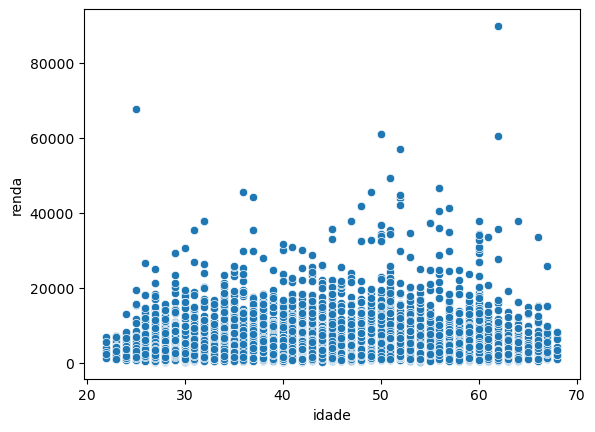

In [29]:
sns.scatterplot(x='idade', y='renda', data=df_quant)

Outliers são valores que se desviam significativamente dos demais dados em um conjunto.
Sendo assim, como podemos observar no gráfico de disperção acima, há alguns na nossa base de dados.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [33]:
df_log = df.copy()
df_log['log_renda'] = np.log(df_log['renda'])

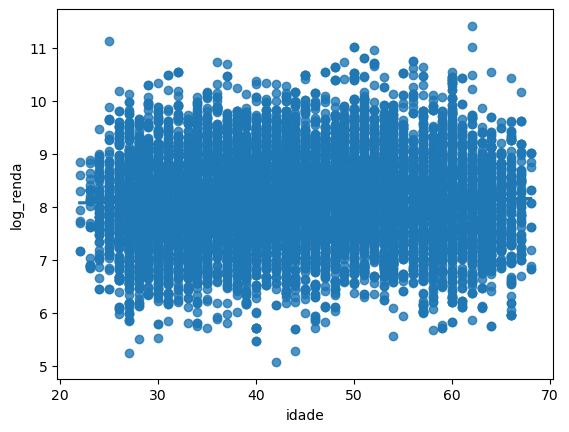

In [34]:
_ = sns.regplot(x='idade', y='log_renda', data=df_log)

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

**Distribuição mais simétrica:** *A transformação logarítmica tende a "comprimir" a cauda direita, aproximando a distribuição de uma normal. Isso significa que a diferença entre os valores mais altos e mais baixos da renda se torna menos acentuada.*

**Menor impacto de outliers:** *Os outliers tendem a ter menos influência na análise após a transformação logarítmica.*

**Relação linear:** *A relação entre a idade e a renda transformada se tornou mais linear.*